In [36]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [37]:
def initialize_weights(n, dims):
    params = {}
    L = len(dims)
    params['W1'] = tf.Variable(np.random.randn(dims[0], n)/np.sqrt(dims[0]))
    params['b1'] = tf.Variable(np.zeros((dims[0], 1)))
    for i in range(1, L):
        params['W' + str(i+1)] = tf.Variable(np.random.randn(dims[i], dims[i-1])/np.sqrt(dims[i]))
        params['b' + str(i+1)] = tf.Variable(np.zeros((dims[i], 1)))
    return params

In [38]:
def compute_cost():
    m = X_train.shape[0]
    A = X_train.T
    for i in range(1,L+1):
        Z = tf.add(tf.matmul(params['W'+str(i)],A), params['b'+str(i)])
        if i == L:
            A = tf.nn.sigmoid(Z)
        else:
            A = tf.nn.relu(Z)
    cost = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = A, labels = y_train.reshape((1,m))))/m
    return cost

In [39]:
def make_predictions():
    A = X_test.T
    for i in range(1,L+1):
        Z = tf.add(tf.matmul(params['W'+str(i)],A), params['b'+str(i)])
        if i == L:
            A = tf.nn.sigmoid(Z)
        else:
            A = tf.nn.relu(Z)
    y_pred = np.where(A>0.5, 1, 0)
    return y_pred

In [40]:
def print_accuracy(y_test, y_pred):
    m = y_test.shape[0]
    print(accuracy_score(y_test.reshape(m,), y_pred.reshape(m,)))

In [41]:
#loading breast-cancer data-set
X, y = load_breast_cancer(return_X_y=True)
y = y.astype('float64')

#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scaling data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#defining parameters
n = X_train.shape[1]            #number of features
m = X_train.shape[0]            #number of training examples
L = 5                           #number of layers
dims = [35, 25, 10, 15, 1]      #layer dimensions
alpha = 0.009                   #learning rate
itr = 100                      #number of iterations

In [42]:
#implementing gradient descent
optimizer = tf.keras.optimizers.Adam(alpha)
params = initialize_weights(n, dims)
cost_itr = []
for i in range(0, itr):
    optimizer.minimize(compute_cost, var_list=list(params.values()))
    cost_itr.append(compute_cost())

0.9824561403508771


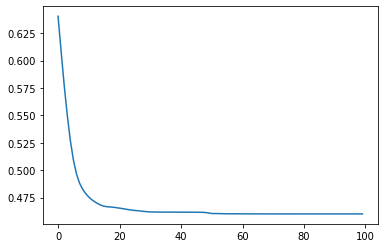

In [43]:
y_pred = make_predictions()
print_accuracy(y_test, y_pred)
plt.plot(range(0,itr), cost_itr)